In [48]:
# place imports here
# this cell failing? Try doing "control-shift-p" then select "restart kernel"
from import_helper import matrices as mt
from import_helper import workflow as wf
from import_helper import helpers as hp

import numpy as np

In [49]:
# constants
rm = 300
sigma = 0.3
ps = 0.191
ad = 0.2
nd = 4

# domain center vectors
vectors = [
    [0, 0, 1],
    [-0.4714045208, -0.8164965809, -0.3333333333],
    [-0.4714045208, 0.8164965809, -0.3333333333],
    [0.9428090416, 0, -0.3333333333]
]
angles = hp.generate_angles(vectors)
print(angles.shape)

(4, 4)


In [50]:
# This is how we would generate F
# F = mt.generateF(50, 1, 1150, 0.001, 0.00499, 101, 0, 1, 200)

# Reading in F
F = mt.readFBin('data-fig-7.bin', (200, 101, 1150))

# testing that the read is working
print(F.shape)
print(F[0][0][0])
print(F[-1][-1][-1])

Fhet = F[1:]
print(Fhet.shape)

(200, 101, 1150)
2549.249267578125
525.01318359375
(199, 101, 1150)


In [51]:
# getting our vectors
q = [0.001+(0.00499*i) for i in range(0, 101)]
r = list(range(50, 1200))
s = [0.0003899742547, 0.0005443147897, 0.0007407515825, 0.0009852044515, 0.001283210872, 0.00163968678, 0.002058702177, 0.002543282518, 0.003095244932, 0.003715076042, 0.00440185567, 0.005153228265, 0.005965421544, 0.006833309801, 0.007750517601, 0.008709558238, 0.009702000405, 0.01071865599, 0.01174978169, 0.01278528736, 0.01381494433, 0.01482858762, 0.0158163067, 0.01676862053, 0.01767663308, 0.01853216722, 0.01932787487, 0.02005732313, 0.02071505594, 0.02129663226, 0.02179864189, 0.02221870057, 0.02255542655, 0.02280840072, 0.02297811293, 0.02306589685, 0.02307385584, 0.0230047823, 0.02286207276, 0.02264964059, 0.02237182856, 0.02203332256, 0.02163906818, 0.02119419113, 0.0207039227, 0.02017353076, 0.01960825703, 0.01901326087, 0.01839356987, 0.01775403712, 0.0170993052, 0.01643377666, 0.01576159058, 0.01508660503, 0.01441238481, 0.01374219419, 0.01307899401, 0.01242544277, 0.01178390115, 0.01115643951, 0.01054484785, 0.009950647902, 0.009375106761, 0.008819251866, 0.008283886829, 0.007769607864, 0.007276820528, 0.006805756503, 0.006356490223, 0.005928955157, 0.005522959594, 0.005138201798, 0.004774284452, 0.004430728295, 0.004106984906, 0.003802448614, 0.003516467482, 0.003248353396, 0.002997391249, 0.002762847233, 0.002543976289, 0.002340028719, 0.002150256028, 0.001973916019, 0.001810277196, 0.001658622519, 0.001518252568, 0.001388488153, 0.001268672424, 0.001158172531, 0.001056380875, 0.0009627159912, 0.0008766231134, 0.0007975744529, 0.0007250692286, 0.0006586334831, 0.000597819717, 0.0005422063677, 0.0004913971607, 0.0004450203564, 0.0004027279126, 0.000364194584, 0.0003291169729, 0.0002972125485, 0.0002682186457, 0.0002418914562, 0.0002180050206, 0.0001963502307, 0.0001767338484, 0.0001589775461, 0.000142916976, 0.0001284008685, 0.0001152901654, 0.0001034571888]
t = list(range(95, 661, 5))

l = list(range(1, 200, 1))

z = list(range(-20, 21, 1))
d = [0.191, 0.191, 0.191, 0.191, 0.191, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.191, 0.191, 0.191, 0.191, 0.191, 0.191]
m = [0.191, 0.191, 0.191, 0.191, 0.191, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.191, 0.191, 0.191, 0.191, 0.191, 0.191]
print(f'q from {q[0]} to {q[-1]}, step {q[1]-q[0]}, length {len(q)}')
print(f'r from {r[0]} to {r[-1]}, step {r[1]-r[0]}, length {len(r)}')
print(f's from {s[0]} to {s[-1]}, step undefined, length {len(s)}')
print(f't from {t[0]} to {t[-1]}, step {t[1]-t[0]}, length {len(t)}')

print(f'l from {l[0]} to {l[-1]}, step {l[1]-l[0]}, length {len(l)}')

print(f'z from {z[0]} to {z[-1]}, step {z[1]-z[0]}, length {len(z)}')
print(f'd from {d[0]} to {d[-1]}, step undefined, length {len(d)}')
print(f'm from {m[0]} to {m[-1]}, step undefined, length {len(m)}')


q from 0.001 to 0.49999999999999994, step 0.00499, length 101
r from 50 to 1199, step 1, length 1150
s from 0.0003899742547 to 0.0001034571888, step undefined, length 114
t from 95 to 660, step 5, length 114
l from 1 to 199, step 1, length 199
z from -20 to 20, step 1, length 41
d from 0.191 to 0.191, step undefined, length 41
m from 0.191 to 0.191, step undefined, length 41


In [52]:
# getting DMOT matrices
(Dmat, Mmat, Omat, Tmat) = mt.generateDMOT(r, s, ps, t, z, d, m)
print(Dmat.shape)
print(Mmat.shape)
print(Omat.shape)
print(Tmat.shape)


(1150, 114)
(1150, 114)
(1150, 114)
(1150, 114)


In [53]:
# step 1
Wp = wf.step1(Fhet, Omat)
print(Wp.shape)
# fix for step 2
# Wp = np.swapaxes(Wp, 1, 2) # swapping axes
# Wp.shape

(114, 101, 199)


In [54]:
wl0 = [hp.e26(i, hp.alpha(nd, ad)) for i in l]
print(len(wl0))
wl = [hp.sum_Cl(wl0[i-1], angles, nd, ad, i) for i in l]
print(len(wl0))


199
199


In [55]:
Imon = wf.step2(Wp, wl)
print(Imon.shape)

(114, 101)


In [56]:
iq = wf.step3(Imon, s)
print(len(iq))
for i in range(5):
    print(f'q => {round(q[i], 5)}\t\tiq => {iq[i]}')

101
q => 0.001		iq => 388605.7611616696
q => 0.00599		iq => 6380420958.669342
q => 0.01098		iq => 23804173388.460327
q => 0.01597		iq => 15560051920.32766
q => 0.02096		iq => 8308668561.799906


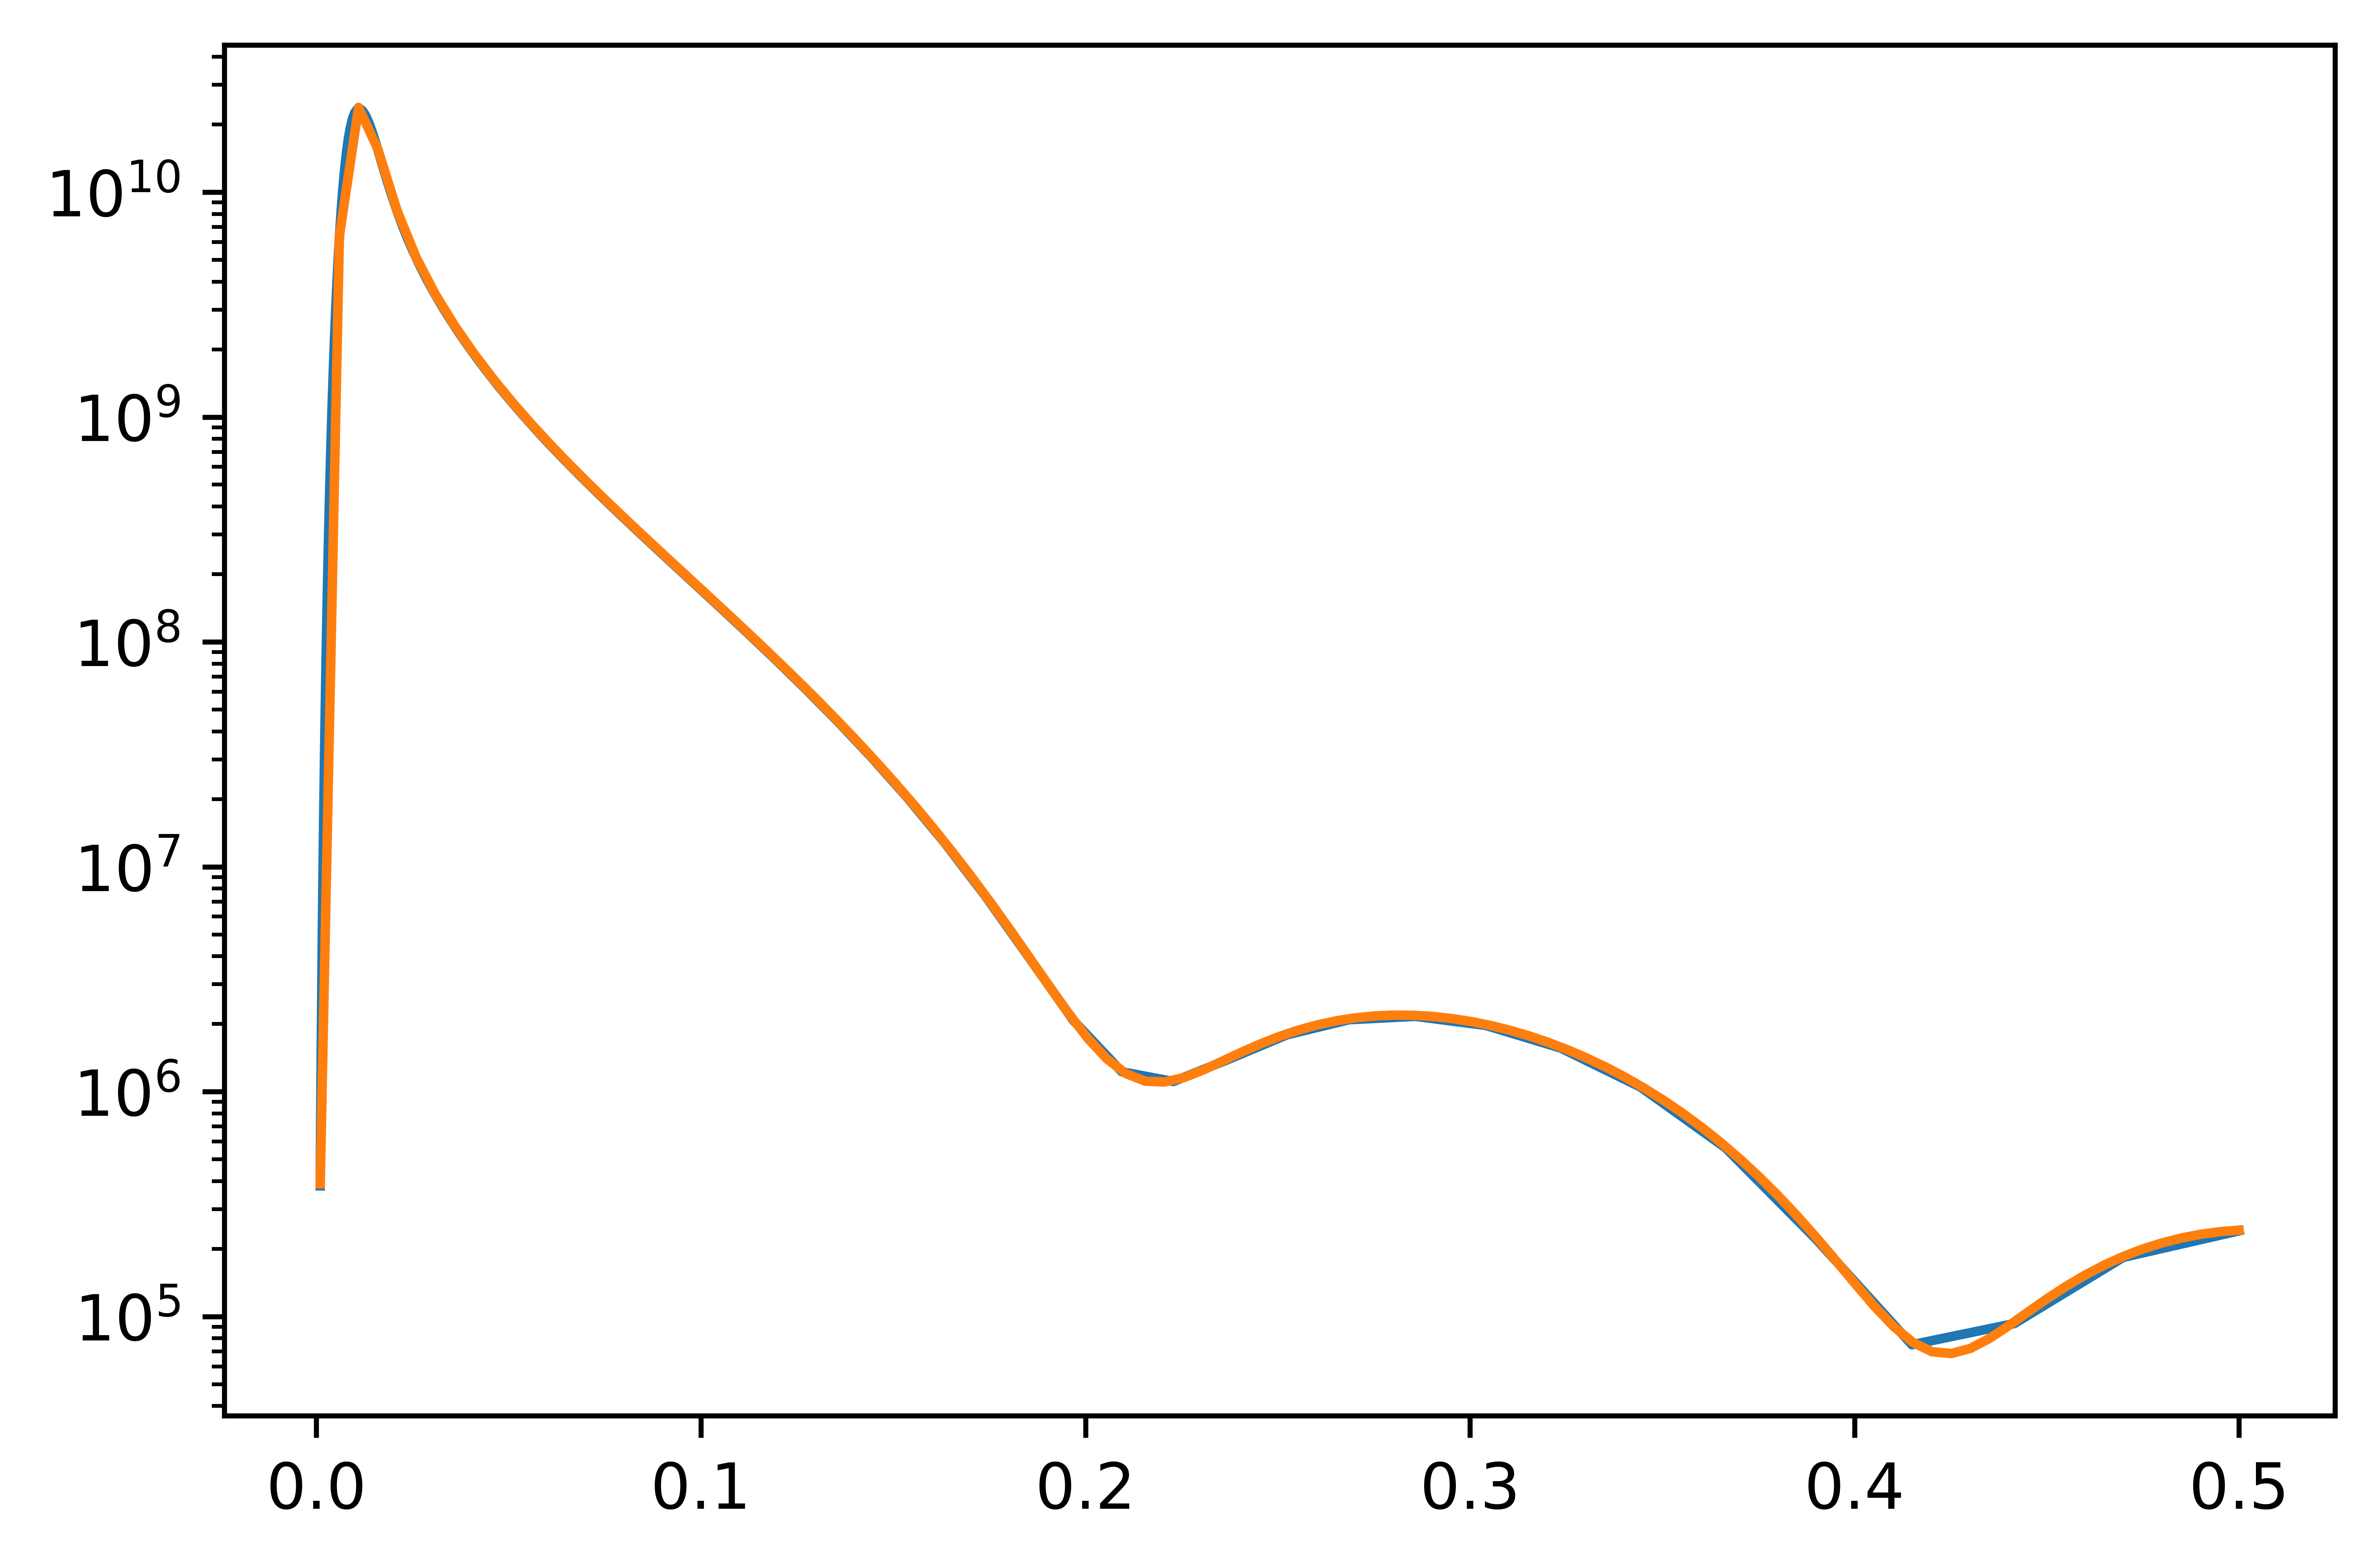

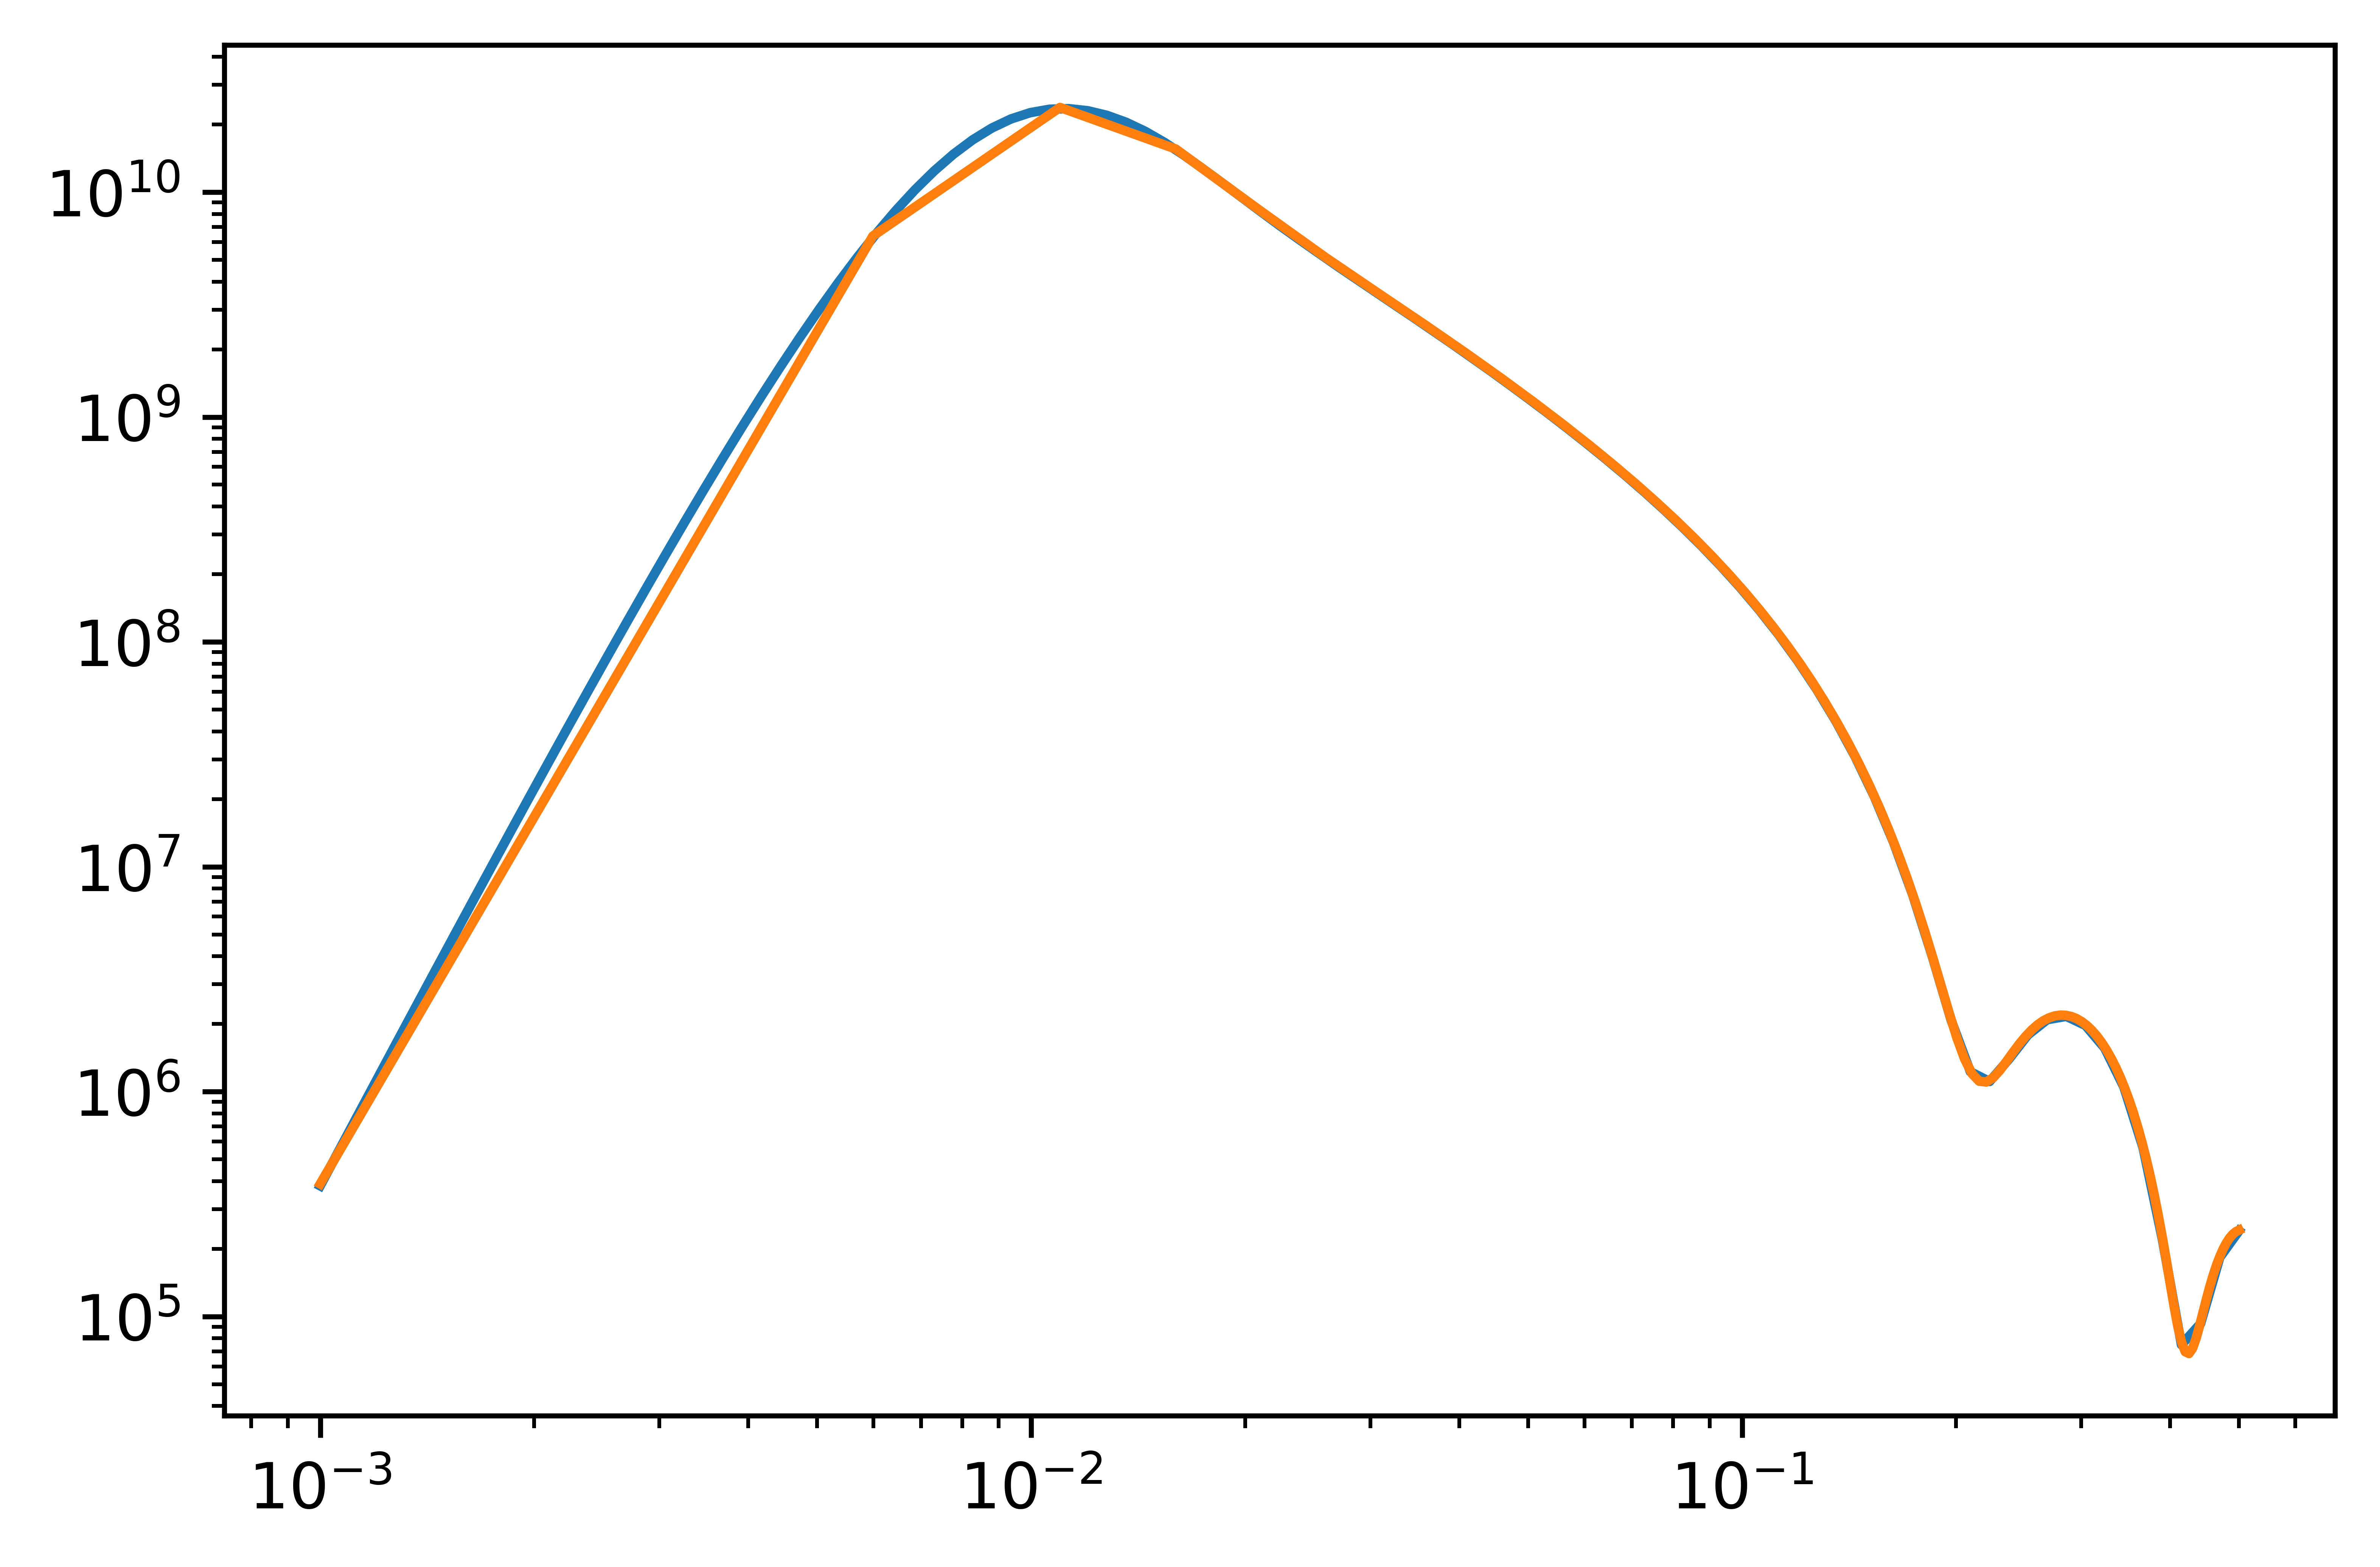

In [57]:
# importing matplotlib module 
from matplotlib import pyplot as plt 

qfred = [0.001, 0.001064117781, 0.001132346651, 0.001204950206, 0.001282208939, 0.00136442133, 0.001451904998, 0.001544997924, 0.001644059763, 0.001749473226, 0.001861645567, 0.001981010149, 0.002108028123, 0.002243190208, 0.002387018586, 0.002540068921, 0.002702932503, 0.002876238536, 0.003060656568, 0.003256899075, 0.003465724216, 0.003687938761, 0.00392440121, 0.004176025106, 0.004443782569, 0.004728708045, 0.005031902311, 0.00535453672, 0.005697857731, 0.006063191724, 0.006451950121, 0.006865634845, 0.007305844114, 0.007774278626, 0.008272748118, 0.008803178368, 0.009367618628, 0.009968249546, 0.01060739158, 0.01128751399, 0.01201124434, 0.01278137867, 0.01360089231, 0.01447295134, 0.01540092486, 0.01638839798, 0.01743918569, 0.01855734757, 0.01974720352, 0.02101335038, 0.02236067977, 0.02379439694, 0.02532004086, 0.02694350569, 0.02867106348, 0.03050938845, 0.03246558272, 0.03454720384, 0.03676229388, 0.03911941058, 0.04162766037, 0.04429673357, 0.04713694182, 0.05015925792, 0.05337535822, 0.05679766774, 0.06043940815, 0.06431464887, 0.06843836142, 0.07282647727, 0.07749594938, 0.08246481767, 0.08775227877, 0.09337876014, 0.09936599901, 0.1057371263, 0.1125167562, 0.1197310809, 0.1274079721, 0.1355770886, 0.1442699906, 0.1535202622, 0.1633636407, 0.1738381548, 0.1849842715, 0.1968450525, 0.2094663204, 0.222896836, 0.2371884865, 0.2523964858, 0.2685795884, 0.2858003155, 0.3041251975, 0.3236250302, 0.344375149, 0.3664557193, 0.3899520467, 0.4149549066, 0.4415608943, 0.4698727989, 0.5]
iqhetfred = [381036.7485, 551056.2455, 796523.9127, 1150656.259, 1661125.332, 2396242.92, 3453722.894, 4973053.812, 7152900.219, 10275464.74, 14740414.96, 21111839.99, 30182773.94, 43063110.58, 61298194.15, 87026886.22, 123189224.4, 173794438.9, 244259290.9, 341823209.9, 476038720.7, 659320683.9, 907512849.6, 1240391830, 1681974288, 2260423033, 3007267825, 3955583706, 5136736293, 6575363299, 8282487005, 10247120366, 12427481515, 14743904386, 17076466140, 19270717149, 21153954903, 22561593759, 23368485333, 23515262399, 23018416719, 21958521016, 20453498942, 18634919374, 16641426694, 14620684209, 12712283091, 11005008880, 9513186768, 8215120128, 7104580534, 6173368001, 5379658258, 4692441120, 4106945081, 3597520568, 3150432411, 2761242920, 2413785418, 2109776230, 1837854585, 1599700184, 1387320380, 1200390071, 1035823350, 890220708.5, 762191101.1, 649912841.9, 551362686.1, 464949700.7, 389428409.8, 323588467.9, 266431061.3, 217028849.5, 174634625.5, 138483255.2, 107889012.9, 82355541.51, 61290304.46, 44255586.01, 30784247.8, 20440027.76, 12805216.02, 7469203.628, 4026163.5, 2074868.764, 1225527.295, 1109074.441, 1390902.714, 1788307.375, 2087920.536, 2160649.455, 1969130.442, 1561375.012, 1047273.072, 562545.7089, 221382.6911, 74865.62472, 92983.71756, 183065.6691, 240334.4958]

plt.figure(dpi=1200)
plt.plot(qfred, iqhetfred)
plt.plot(q, iq)
plt.yscale("log")
plt.show()

plt.figure(dpi=1200)
plt.plot(qfred, iqhetfred)
plt.plot(q, iq)
plt.xscale("log")
plt.yscale("log")
plt.show()
